# illegal and legal position generator

This is a function to create the initial universe of possible positions and illegal positions

In [1]:
spaceMin = 0
spaceMax = 10

def illegal_position_generator(spaceMax, spaceMin):
    from itertools import permutations
    boundary = spaceMax + 2
    lower_boundary = spaceMin - 1
    items = range(lower_boundary, boundary)
    moves = {}
    i = 0
    for p in permutations(items, 2):
        moves[i] = p
        i += 1

    illegal_moves = {}
    legal_moves = {}
    for key,value in moves.items():
        for n,i in enumerate(value):
            try:        
                if i <= spaceMin or i >= spaceMax:
                    illegal_moves[key] = value
            except:
                continue
                
    for key, value in illegal_moves.iteritems():
        if value in moves.values():
            del moves[key]

    #This changes values into keys and vice versa
    moves = {y:x for x,y in moves.iteritems()}
    illegal_moves = {y:x for x,y in illegal_moves.iteritems()}
   
    # include positions at edges
    illegal_moves.update({(spaceMin,spaceMin):10000000, (spaceMax, spaceMax):100000001 })
    
    return moves, illegal_moves

# run function 
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)



In [2]:
print legal_moves
print ''
print illegal_moves

{(5, 9): 81, (4, 7): 67, (1, 3): 27, (9, 1): 122, (4, 8): 68, (5, 6): 78, (2, 8): 44, (9, 8): 129, (7, 8): 104, (5, 4): 77, (2, 1): 38, (8, 9): 117, (6, 2): 87, (1, 6): 30, (9, 4): 125, (5, 1): 74, (3, 7): 55, (2, 5): 41, (8, 5): 114, (5, 8): 80, (1, 2): 26, (7, 4): 101, (4, 9): 69, (2, 9): 45, (8, 1): 110, (7, 6): 103, (6, 3): 88, (1, 5): 29, (7, 2): 99, (3, 6): 54, (5, 7): 79, (8, 6): 115, (5, 3): 76, (4, 1): 62, (9, 7): 128, (6, 4): 89, (3, 2): 51, (2, 6): 42, (8, 2): 111, (7, 1): 98, (4, 5): 65, (7, 9): 105, (9, 3): 124, (8, 3): 112, (1, 4): 28, (6, 7): 91, (3, 9): 57, (2, 3): 39, (1, 9): 33, (8, 7): 116, (6, 8): 92, (4, 2): 63, (9, 6): 127, (6, 5): 90, (3, 5): 53, (2, 7): 43, (6, 9): 93, (7, 3): 100, (4, 6): 66, (9, 2): 123, (5, 2): 75, (6, 1): 86, (3, 1): 50, (3, 8): 56, (1, 8): 32, (7, 5): 102, (4, 3): 64, (1, 7): 31, (9, 5): 126, (3, 4): 52, (2, 4): 40, (8, 4): 113}

{(-1, 0): 0, (3, 0): 49, (8, 0): 109, (0, 7): 19, (0, 10): 22, (-1, 5): 5, (7, 11): 107, (1, 11): 35, (1, -1): 2

# Function combines two dictionaries together

In [7]:
def merge_two_dicts(x, y):
    """Given two dicts, merge them into a new dict as a shallow copy."""
    z = x.copy()
    z.update(y)
    return z
# run function 

# This function is going to randomly select legal positions to place a node on

I'm currently outputing a set of node_names, which may not be needed going forward. 

In this function node_names has names as keys and the positions correspond to the keys in layout_old whose keys are positions

In [8]:
node_number = 4

In [9]:
def layout_gen(node_number, legal_moves): 
    import random
    
    wanted_keys = random.sample(legal_moves.keys(), node_number)
    #using dictionary comprehension to subset a dictionary by keys
    layout_old = dict((k, legal_moves[k]) for k in wanted_keys if k in legal_moves)
    
   # #I am going to omit making this dict because I can keep tract of names using the values of layout_old as a name attribute in a graph
   # #layout_names = {y:x for x,y in layout_old.iteritems()}
    
    return layout_old#, layout_names

#layout_old, node_names = layout_gen(node_number, legal_moves)
layout_old = layout_gen(node_number, legal_moves)

Importantly, this updates illegal_moves to include the positions in which I've included a node from layout_old

In [10]:
illegal_moves = merge_two_dicts(illegal_moves, layout_old)

In [11]:
print layout_old
print ''
print illegal_moves

{(4, 5): 65, (3, 7): 55, (9, 5): 126, (8, 4): 113}

{(-1, 0): 0, (3, 0): 49, (8, 0): 109, (0, 7): 19, (0, 10): 22, (-1, 5): 5, (7, 11): 107, (1, 11): 35, (1, -1): 24, (4, 0): 61, (10, 8): 141, (9, 0): 121, (11, 5): 150, (10, 7): 140, (3, 10): 58, (6, 10): 94, (8, 10): 118, (9, 11): 131, (5, 0): 73, (0, 4): 16, (10, 0): 133, (-1, 9): 9, (-1, 6): 6, (4, 10): 70, (5, 11): 83, (4, 5): 65, (6, 0): 85, (-1, 11): 11, (0, 1): 13, (11, 7): 152, (10, 5): 138, (7, 0): 97, (11, 8): 153, (2, 11): 47, (-1, 10): 10, (6, -1): 84, (-1, 3): 3, (11, 9): 154, (0, 9): 21, (-1, 4): 4, (8, 4): 113, (2, -1): 36, (10, -1): 132, (10, 11): 143, (11, 2): 147, (10, 6): 139, (3, 11): 59, (11, 3): 148, (0, 5): 17, (7, -1): 96, (3, 7): 55, (0, 3): 15, (10, 3): 136, (4, -1): 60, (-1, 1): 1, (11, -1): 144, (0, 6): 18, (8, -1): 108, (0, 11): 23, (11, 1): 146, (7, 10): 106, (1, 10): 34, (10, 9): 142, (5, -1): 72, (0, 0): 10000000, (11, 4): 149, (10, 4): 137, (6, 11): 95, (8, 11): 119, (-1, 2): 2, (11, 10): 155, (2, 10): 

# Mover Function

This function moves an object randomly and updates layout_old and node_names dict

In [10]:
def mover(layout_old, node_names, illegal_moves):

    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}

    from operator import add
    import random

    position_selected = random.choice(layout_old.keys())
    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))
    
    if new_posit not in illegal_moves.keys():        
        idx = layout_old.get(position_selected)
        
        print idx 
        
        del layout_old[position_selected]
        layout_old[new_posit] = idx
        node_names[idx] = new_posit
        del illegal_moves[position_selected]
        illegal_moves[new_posit] = idx
        
    return layout_old, node_names

print layout_old
mover(layout_old, node_names, illegal_moves)

{(8, 9): 117, (5, 9): 81, (8, 2): 111, (4, 3): 64, (6, 8): 92}


NameError: name 'node_names' is not defined

# Association function

This association function works for a single nod at a time, which is what we want. 

In [14]:
from igraph import * 
from operator import add
import random

In [491]:
def newNeighborEdge(x, layout, g):

    possibilities = { (1,0):1, (0,1):2, (-1,0):3, (0,-1):4 }


    potent_associations = {}
    
    if x not in layout.keys():
        pass
    else:
        for key, value in possibilities.items():
            newAssc = tuple(map(add, key, x))
            potent_associations[newAssc] = value

        availOptionsToBind = dict((k, layout[k]) for k in potent_associations if k in layout)

        if not availOptionsToBind:
            pass
        else:
            newNodePosition = random.choice( availOptionsToBind.keys() )

            v1_position = g.vs['name'].index( layout[x] )
            v2_position = g.vs['name'].index( layout[newNodePosition] )
            
            if g.degree(v1_position) < 4 and g.degree(v2_position) < 4:
                g.add_edge(v1_position, v2_position)
            else:
                pass
            
    return g

x = (8,7)
g = Graph(6)

print layout_old
g.vs["name"] = layout_old.values()
g.vs['position'] = layout_old.keys()

print g
print ''
newNeighborEdge(x, layout_old, g)
print g

{(5, 9): 80, (2, 6): 67, (4, 9): 69, (9, 8): 129, (6, 2): 98, (9, 4): 124, (2, 2): 64, (9, 5): 126, (9, 6): 127, (1, 1): 26}
IGRAPH UN-- 6 0 --
+ attr: name (v), position (v)

IGRAPH UN-- 6 0 --
+ attr: name (v), position (v)


# Dissociation Function

In [245]:
print g 
print layout_old
x = (6,9)
indx = g.vs['name'].index( layout_old[x] )
print g.degree()[indx]
prob = [0.5, 0.25, 0.125, 0.125]
edgeType = numpy.random.choice([1, 2, 3, 4], p = prob )
print edgeType


print ''
print g.degree()
del_options =g.degree()
probs =numpy.random.choice([1, 2, 3, 4], len(del_options),p = prob )
for i in probs:
    if probs[i] in del_options:
        delete_idx = del_options.index( probs[i] )
        
        v1_position = g.vs['name'].index( layout[x] )
        v2_position = g.vs['name'].index( layout[delete_idx] )





IGRAPH UN-- 6 3 --
+ attr: name (v), position (v)
+ edges (vertex names):
40--115, 116--98, 44--98
{(6, 9): 44, (4, 9): 98, (4, 4): 40, (9, 4): 116, (9, 5): 115}
1
2

[1, 1, 1, 1, 2, 0]


0

IGRAPH UN-- 6 3 --
+ attr: name (v), position (v)
+ edges (vertex names):
40--115, 116--98, 44--98
[1, 1, 1, 1, 2, 0]
[116, 40, 44, 115, 98, 116]


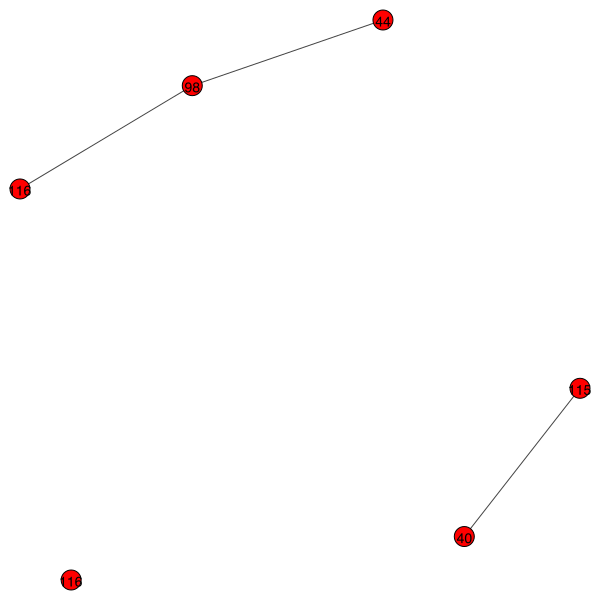

In [256]:
print g
print g.degree()
print g.vs['name']
plot(g, vertex_label= g.vs['name'])

In [272]:
delete_idx = del_options.index( probs[5] )
print delete_idx
print del_options
v1_position = g.vs['name'].index( layout_old[x] )
#v2_position = g.vs['name'].index( layout_old[delete_idx] )
print delete_idx
g.vs['name']


#g.add_edge(v1_position, v2_position)
#g.delete_edges(v1_position, v2_position)

4
[1, 1, 1, 1, 2, 0]
4
IGRAPH UN-- 6 3 --
+ attr: name (v), position (v)
+ edges (vertex names):
40--115, 116--98, 44--98


091117 Left off trying to get neighbors of node

In [304]:
print g.vs.select(_degree = probs[1] )['name']

print g
g.neighbors('1')

[116, 40, 44, 115]
IGRAPH UN-- 6 3 --
+ attr: name (v), position (v), name (e)
+ edges (vertex names):
40--115, 116--98, 44--98


ValueError: no such vertex: '1'

In [227]:
 # this gives me the index by name in the iGraph dict I have made prev.

#if g.degree(g.vs['name'].index(EdgeToBreak) ) != 0:
#    print "hello"

prob = [0.5, 0.25, 0.125, 0.125]
edgeType = numpy.random.choice([1, 2, 3, 4], p = prob )

x = (6,9)
EdgeToBreak = g.vs['name'].index( layout_old[x] )
print g
print EdgeToBreak
print g.vs['name'].index(layout_old[x] )
#print g.degree(g.vs['name'].index(EdgeToBreak) )
#if edgeType in g.degree(g.vs['name'].index(EdgeToBreak) ):
#    print 'yes'
#else:
#    print 'no'





IGRAPH UN-- 6 3 --
+ attr: name (v), position (v)
+ edges (vertex names):
40--115, 116--98, 44--98
2
2


Left off here – trying to make a dissociation function! 

In [331]:
x = (6,9)
print layout_old
print g.vs['name'].index(layout_old[x])

EdgeToBreak = g.vs['name'].index( layout_old[x] )
prob = [0.5, 0.25, 0.125, 0.125]
edgeType = numpy.random.choice([1, 2, 3, 4], p = prob )

print g.degree( g.vs['name'].index(layout_old[x] ) )
#if edgeType in g.degree():
#    print 'yes'
#    g.degree( g.vs['name'].index(layout_old[x] ) )
    
    #v1_position = g.vs['name'].index( layout[x] )
    #v2_position = g.vs['name'].index( layout[newNodePosition] )
    
print ''
print g.degree()
print g
print g.vs['name']
print g.vs.find(_degree=1)  
    

{(6, 9): 44, (4, 9): 98, (4, 4): 40, (9, 4): 116, (9, 5): 115}
2
1

[1, 1, 1, 1, 2, 0]
IGRAPH UN-- 6 3 --
+ attr: name (v), position (v), name (e)
+ edges (vertex names):
40--115, 116--98, 44--98
[116, 40, 44, 115, 98, 116]
igraph.Vertex(<igraph.Graph object at 0x11071aaf8>,0,{'position': (4, 7), 'name': 116})


In [344]:
print edgeType



if g.vs.select(_degree=1)['name'] > 1:
    print random.choice(g.vs.select(_degree=1)['name'])
     
print g.vs['name']





2
40
[116, 40, 44, 115, 98, 116]
IGRAPH UN-- 6 3 --
+ attr: name (v), position (v), name (e)
+ edges (vertex names):
40--115, 116--98, 44--98


In [8]:
from igraph import * 

#x = (2, 7)
def edgeDeleter(x, layout_old, g):
    v1 = g.vs['name'].index( layout_old[x] ) #this find me the index of a node given its name
    node_degree = g.degree( v1 )             #this gets me the degree of the chosen node
    
    if node_degree == 1:                     #preferentially removes single edges over multi edges 
        v2 = g.neighbors(v1)[0]              #finds me which node the above chosen node is bound to
        g.delete_edges(v1,v2)                #deletes the edge between the two chosen nodes
        #return v1,v2
    elif node_degree == 2:
        v2 = g.neighbors(v1)[0]
        g.delete_edges(v1,v2)
        #return v1,v2
    elif node_degree == 3:
        v2 = g.neighbors(v1)[0]
        g.delete_edges(v1,v2)
        #return v1,v2
    elif node_degree == 4:
        v2 = g.neighbors(v1)[0]
        g.delete_edges(v1,v2)
        #return v1,v2
    else:
        pass

    return g#, v1, v2 
    

#print g
#g, out1, out2, = edgeDeleter(x, layout_old, g)
#print g

#g.vs['name']

In [456]:
print out1, out2
print g

0 2
IGRAPH UN-- 6 0 --
+ attr: name (v), position (v)


In [454]:
print layout_old

{(2, 7): 43, (9, 1): 87, (2, 8): 45, (1, 4): 42, (8, 6): 113}


In [381]:
print g.vs['name'].index( layout_old[ (4,7) ] )
print layout_old
print g
print g.vs['name']

1
{(4, 7): 40, (4, 9): 98, (8, 2): 44, (7, 7): 116, (7, 2): 115}
IGRAPH UN-- 6 3 --
+ attr: name (v), position (v), name (e)
+ edges (vertex names):
40--115, 116--98, 44--115
[116, 40, 44, 115, 98, 116]


In [363]:
v2 = g.neighbors(v1)[0]
print v2, v1
g.delete_edges(v1,v2)
print g


4 2
IGRAPH UN-- 6 2 --
+ attr: name (v), position (v), name (e)
+ edges (vertex names):
40--115, 116--98


In [9]:
from igraph import * 
g = Graph(5)

g.vs["name"] = (10, 34, 32, 4)
x = g.vs['name'].index( 4 )
y = g.vs['name'].index( 10 )
z = g.vs['name'].index( 32 )
g.add_edge(x, y)
g.add_edge(x, z)


print g

print len(g.es)

IGRAPH UN-- 5 2 --
+ attr: name (v)
+ edges (vertex names):
10--4, 32--4
2


In [415]:
print layout_old
print g.vs['name']
print g

{(4, 5): 42, (3, 1): 54, (2, 5): 33, (7, 9): 104, (9, 6): 129}
[129, 42, 104, 33, 54, 129]
IGRAPH UN-- 6 3 --
+ attr: name (v), position (v)
+ edges (vertex names):
42--33, 42--54, 33--54


# New Movement Function (281017)

this takes in a position to move into rather than randomly populating one inside the function! 

In [10]:
import random
from operator import add

position_selected = random.choice(layout_old.keys())

#new potential direction to take if valid

def Mover(position_selected, layout_old, illegal_moves):
    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    
    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))

    if new_posit not in illegal_moves.keys():        
        idx = layout_old.get(position_selected)
        
        del layout_old[position_selected]
        layout_old[new_posit] = idx

        del illegal_moves[position_selected]
        illegal_moves[new_posit] = idx
    return layout_old

print layout_old
Mover(position_selected, layout_old, illegal_moves)

{(2, 7): 43, (3, 2): 51, (3, 1): 50}


{(2, 7): 43, (3, 1): 50, (3, 2): 51}

# I am going to write a function that will tell me which nodes can associate

# Find Potential options to bind to for each Node

This function will find whether there exists options to bind to with respect to every node 

In [10]:
x = (6, 2)
def nearby(x, layout_old):
    from operator import add
    
    binding_counts = ()
    dir_output = {}
    for i in possibilities.values():
        j = 0
        output = tuple(map(add, i, x)) # add each possibility to x
        dir_output[output] = i  # save results in dict
        if x in dir_output.keys():
            del dir_output[x]
        print dir_output
        j = j + 1
        #binding_counts[j] = len( dir_output.keys() )

            
    dir_final_output = dict((k, layout_old[k]) for k in dir_output if k in layout_old)
    
    # this deletes the detection of self 
    
    #return dir_output
    return dir_final_output

## This is using the nearby function to find every nearby binding possibility 

output = {}
for key, value in layout_old.items():
     output[value] = nearby(key, layout_old)
print ''
print output

TypeError: argument 2 to map() must support iteration

# This function selects what to do from a uniform distribution betwee 0 and 1


In [11]:


def allRxn(move, bind, dissociate):

    options = numpy.zeros((3, 1))
    options[0] = move/(move + bind + dissociate)
    options[1] = (bind + move)/(move + bind + dissociate)
    options[2] = (bind + move + dissociate)/(move + bind + dissociate)
    
    random_value = random.uniform(0, 1)
    
    if 0 <= random_value <= options[0]:
        return 'move'
    elif options[0] <= random_value <= options[1]:
        return 'bind'
    else:
        return 'dissociate'


allRxn(move, bind, dissociate)

NameError: name 'move' is not defined

# pre-setup for node binding (delete afterwards)

In [163]:
print g

IGRAPH UN-- 4 2 --
+ attr: name (v)
+ edges (vertex names):
10--4, 34--32


{(6, 7): 2, (9, 9): 1, (6, 8): 3}
IGRAPH UN-- 3 0 --
+ attr: name (v), positions (v)

[2, 3, 1]

[(6, 7), (6, 8), (9, 9)]


AttributeError: Unknown property layout

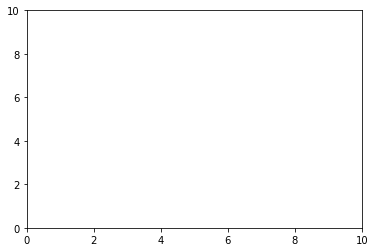

In [261]:
import collections
from igraph import * 

node_number = 3
g = Graph(node_number)

layout_old = {}
layout_old = {(9,9):1, (6,7):2, (6,8):3}
print layout_old

# sort dict to store as graph attribute 
od = collections.OrderedDict(sorted(layout_old.items()))

g.vs["name"] = od.values()
g.vs["positions"] = od.keys()


print g
print ''
print g.vs['name']
print ''
print g.vs['positions']


x = g.vs['name'].index( 2 )
y = g.vs['name'].index( 3 )

g.add_edge(x, y)

import matplotlib.pyplot as plt

plt.ylim(0, 10)
plt.xlim(0, 10)
plt.plot(g, layout = g.vs['positions'] )

In [ ]:
newNeighborEdge(x, layout_old, g)

# Gillespie starts here (as of 28-11-17)

In [ ]:
import random
from operator import add
import numpy 
from igraph import *


# 2D lattice
spaceMin = 0
spaceMax = 100

# Find legal and illegal moving options
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)

# Number of objects to simulate
node_number = 50

# Place objects in 2D lattice
layout_old = layout_gen(node_number, legal_moves)

# Updates illegal moves dict
illegal_moves = merge_two_dicts(illegal_moves, layout_old)

In [ ]:
t = 0
total_time = 500
k_move = 1e-3
k_bind = 1e-4
k_off = 1e-2
tau = 1e-3
allGraphs = {}
times = []

while t <= total_time:
    for i in range( len(layout_old.keys() ) ):
        
        ## Calculate all possible reactions
        
        move = len(layout_old.keys() )*4                              # movement
        move_k = move * k_move * tau
        
        bind = len(layout_old.keys() )*4                              # binding
        bind_k = bind * k_bind * tau
        
        dissociate = sum(g.vs.degree())                               # dissociation
        dissociate_k = dissociate * k_off * tau
        
        
        rate_sum = move_k + bind_k + dissociate_k                     # Time at which the next reaction will take place
        tau = random.expovariate(lambd=rate_sum)                      # Time at which the next reaction will take place
        times.append(tau)                                             # Save time as a tuple
        reaction = allRxn(move_k, bind_k, dissociate_k)               # Sample from uniform distribution
        
        reaction = 'move'     ## delete this! 
                
        if reaction == 'move':

            position_selected = random.choice(layout_old.keys() )     #randomly select a node
            
            #move in new direction
            Mover(position_selected, layout_old, illegal_moves)

                       
            illegal_moves = merge_two_dicts(illegal_moves, layout_old) # Update illegal moves 
        
    
#        if reaction == 'bind':
#            position_selected = random.choice(layout_old.keys() )
#            newNeighborEdge(position_selected, layout_old, g)         #form an edge between a neighbor, if one exists

        
#        if reaction == 'dissociate':
#            
#            position_selected = random.choice(layout_old.keys() )
#            edgeDeleter(position_selected, layout_old, g)
        
#        print reaction
                
        t = t + 1

# Movement Analysis

In [14]:
import random
from operator import add
import numpy 
from igraph import *


# 2D lattice
spaceMin = 0
spaceMax = 100

# Find legal and illegal moving options
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)

# Number of objects to simulate
node_number = 50

# Place objects in 2D lattice
layout_old = layout_gen(node_number, legal_moves)

# Updates illegal moves dict
illegal_moves = merge_two_dicts(illegal_moves, layout_old)

In [124]:
t = 0
total_time = 500
k_move = 1e-3
k_bind = 1e-4
k_off = 1e-2
tau = 1e-3
allGraphs = {}
times = []

movement_positions = [] ## for step capturing of movement

while t <= total_time:
    for i in range( len(layout_old.keys() ) ):
        
        ## Calculate all possible reactions
        
        move = len(layout_old.keys() )*4                              # movement
        move_k = move * k_move * tau
        
        bind = len(layout_old.keys() )*4                              # binding
        bind_k = bind * k_bind * tau
        
        dissociate = sum(g.vs.degree())                               # dissociation
        dissociate_k = dissociate * k_off * tau
        
        
        rate_sum = move_k + bind_k + dissociate_k                     # Time at which the next reaction will take place
        tau = random.expovariate(lambd=rate_sum)                      # Time at which the next reaction will take place
        times.append(tau)                                             # Save time as a tuple
        reaction = allRxn(move_k, bind_k, dissociate_k)               # Sample from uniform distribution
        
        reaction = 'move'     ## delete this! 
                
        if reaction == 'move':

            position_selected = random.choice(layout_old.keys() )     #randomly select a node

            layout_old_old = layout_old.copy() ## for movement step capturing
            

            #move in new direction
            Mover(position_selected, layout_old, illegal_moves)

                       
            illegal_moves = merge_two_dicts(illegal_moves, layout_old) # Update illegal moves 
        
        ###                                           ###
        ###   This is to capture movement per step    ###
        ###                                           ###
        
            inverted_dict_one = {v: k for k, v in layout_old.items()}
            result = [k[1] - inverted_dict_one[v][1] for k, v in sorted(layout_old_old.items())]
#            result = [abs(k[1] - inverted_dict_one[v][1]) for k, v in sorted(layout_old_old.items())]
            movement_positions.append( result )
            
            
        ###                                           ###
        ###   Step capturing ends here                ###
        ###                                           ###
        
        
#        if reaction == 'bind':
#            position_selected = random.choice(layout_old.keys() )
#            newNeighborEdge(position_selected, layout_old, g)         #form an edge between a neighbor, if one exists

        
#        if reaction == 'dissociate':
#            
#            position_selected = random.choice(layout_old.keys() )
#            edgeDeleter(position_selected, layout_old, g)
        
#        print reaction
                
        t = t + 1

# This will capture movement per step

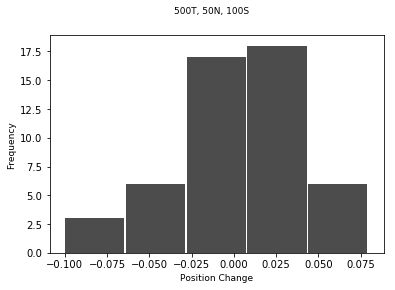

In [158]:
output_movement = list(map(sum, zip(*movement_positions)))

import numpy
myArray = numpy.array(output_movement)
myInt = 50.0 # this is the node number 
newArray = myArray/myInt

import matplotlib.pyplot as plt
#import numpy as np
%matplotlib inline

newArray = list(newArray)

plt.hist(newArray, bins=5, width=0.035, alpha=0.7, color='black')
plt.suptitle('500T, 50N, 100S', fontsize=9)
plt.ylabel('Frequency',  fontsize=9)
plt.xlabel('Position Change',  fontsize=9)
